In [23]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Step :1 read data

In [24]:
df=pd.read_csv('dailysales.csv',parse_dates=['date'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    704 non-null    datetime64[ns]
 1   sales   704 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.1 KB


In [26]:
df.head() 

,date,sales
0,2018-01-01,477.0
1,2018-01-02,365.0
2,2018-01-03,442.0
3,2018-01-04,490.0
4,2018-01-05,396.0


# Step :2 No missing value

In [27]:
df.isnull().sum()

date     0
sales    0
dtype: int64

# Step-3 :Data Structure required for Time series

In [28]:
df=df.groupby('date').sum()

In [29]:
df.head(10)

,sales
date,
2018-01-01,477.0
2018-01-02,365.0
2018-01-03,442.0
2018-01-04,490.0
2018-01-05,396.0
2018-01-06,385.0
2018-01-07,492.0
2018-01-08,473.0
2018-01-09,249.0


In [30]:

df=df.resample(rule='MS').sum() # rule & aggregation parameter

In [31]:
df.head(10)

,sales
date,
2018-01-01,9035.0
2018-02-01,9571.0
2018-03-01,13143.0
2018-04-01,12427.0
2018-05-01,8133.0
2018-06-01,7437.0
2018-07-01,11758.0
2018-08-01,9992.0
2018-09-01,7216.0


<AxesSubplot:xlabel='date'>

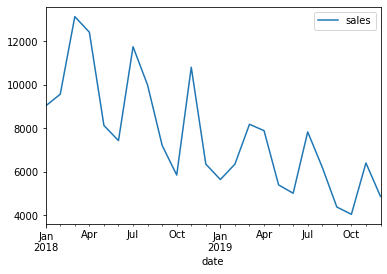

In [32]:
df.plot()

In [33]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

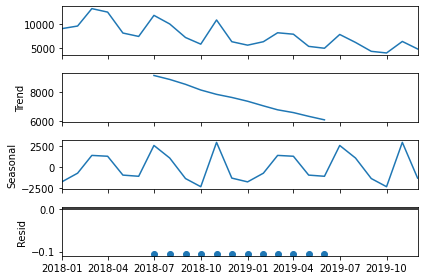

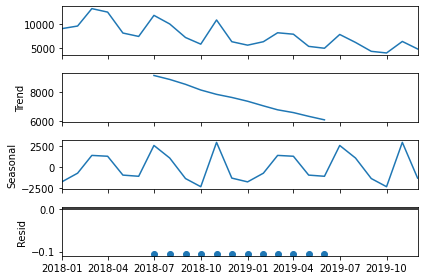

In [34]:
seasonal_decompose(df,model='additive').plot()

# Step 4: Train test Split

In [35]:
train=df[:19] 
test=df[19:] 

In [36]:
train.tail()

,sales
date,
2019-03-01,8188.55
2019-04-01,7894.25
2019-05-01,5397.40
2019-06-01,5012.80
2019-07-01,7837.30


In [37]:
test

,sales
date,
2019-08-01,6207.00
2019-09-01,4379.25
2019-10-01,4043.45
2019-11-01,6406.95
2019-12-01,4867.25


# Step 5: ARIMA Model

c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


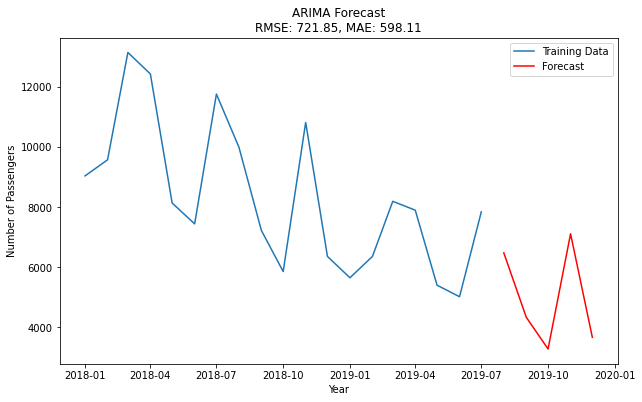

In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
order = (0, 1, 0)  # Non-seasonal order (p, d, q)
seasonal_order = (0, 1, 1, 12)  # Seasonal order (P, D, Q, s)
model = SARIMAX(train.sales, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()


# Forecast future values
forecast_steps = len(test['sales'])
forecast = model_fit.forecast(steps=forecast_steps)

# Evaluate the model using RMSE and MAE
rmse = np.sqrt(mean_squared_error(test['sales'], forecast))
mae = mean_absolute_error(test['sales'], forecast)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train.sales, label='Training Data')
plt.plot(test['sales'].index, forecast, label='Forecast', color='red')
plt.title(f'ARIMA Forecast\nRMSE: {rmse:.2f}, MAE: {mae:.2f}')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Step 5: Holt Winters Model

In [39]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [40]:
hwmodel=ExponentialSmoothing(train.sales,trend='add', seasonal='mul', seasonal_periods=4).fit()

In [41]:
test_pred=hwmodel.forecast(5)

<AxesSubplot:xlabel='date'>

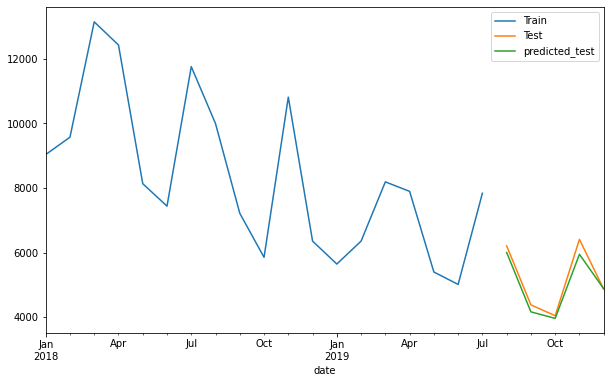

In [42]:
train['sales'].plot(legend=True, label='Train', figsize=(10,6))
test['sales'].plot(legend=True, label='Test')

test_pred.plot(legend=True, label='predicted_test')

# Step: 6. Model Evaluation

In [43]:
np.sqrt(mean_squared_error(test,test_pred))

248.43932061426602